# 2. Predicting who will survive on the Titanic with logistic regression

In [28]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
train = pd.read_csv('https://github.com/ipython-books'
                    '/cookbook-2nd-data/blob/master/'
                    'titanic_train.csv?raw=true')
test = pd.read_csv('https://github.com/ipython-books/'
                   'cookbook-2nd-data/blob/master/'
                   'titanic_test.csv?raw=true')

In [30]:
train[train["Age"] < 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [31]:
train[train.columns[[2, 4, 5, 1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [32]:
data = train[['Age', 'Pclass', 'Survived']]
# Add a 'Female' column.
data = data.assign(Female=train['Sex'] == 'female')
# Reorder the columns.
data = data[['Female', 'Age', 'Pclass', 'Survived']]
data = data.dropna()
data.head()

,Female,Age,Pclass,Survived
0,False,22.0,3,0
1,True,38.0,1,1
2,True,26.0,3,1
3,True,35.0,1,1
4,False,35.0,3,0


In [33]:
data_np = data.astype(np.int32).values
X = data_np[:, :-1]
y = data_np[:, -1]

In [34]:
# We define a few boolean vectors.
# The first column is 'Female'.
female = X[:, 0] == 1

# The last column is 'Survived'.
survived = y == 1

# This vector contains the age of the passengers.
age = X[:, 1]

# We compute a few histograms.
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[survived & female],
                            bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female],
                          bins=bins_)[0],
     'female': np.histogram(age[~survived & female],
                            bins=bins_)[0]}

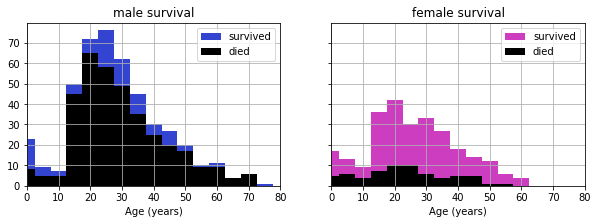

In [35]:
# We now plot the data.
bins = bins_[:-1]
fig, axes = plt.subplots(1, 2, figsize=(10, 3),
                         sharey=True)
for ax, sex, color in zip(axes, ('male', 'female'),
                          ('#3345d0', '#cc3dc0')):
    ax.bar(bins, S[sex], bottom=D[sex], color=color,
           width=5, label='survived')
    ax.bar(bins, D[sex], color='k',
           width=5, label='died')
    ax.set_xlim(0, 80)
    ax.set_xlabel("Age (years)")
    ax.set_title(sex + " survival")
    ax.grid(None)
    ax.legend()

In [49]:
# We split X and y into train and test datasets.
(X_train, X_test, y_train, y_test) = \
        ms.train_test_split(X, y, test_size=.05, random_state = 2023)

In [50]:
# We instanciate the classifier.
logreg = lm.LogisticRegression()

In [51]:
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)

Text(0.5, 1.0, 'Actual and predicted survival outcomes on the test set')

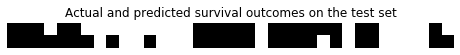

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.imshow(np.vstack((y_test, y_predicted)),
          interpolation='none', cmap='bone')
ax.set_axis_off()
ax.set_title("Actual and predicted survival outcomes "
             "on the test set")

In [53]:
print(y_test)
print(y_predicted)

[0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1]
[0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0]


In [54]:
sum(y_test == y_predicted)/len(y_test)

0.8333333333333334

In [55]:
ms.cross_val_score(logreg, X, y)

array([0.76923077, 0.83216783, 0.77622378, 0.74825175, 0.8028169 ])

In [56]:
grid = ms.GridSearchCV(
    logreg, {'C': np.logspace(-5, 5, 200)})
grid.fit(X_train, y_train)
grid.best_params_

{'C': 0.14820207057988602}

In [57]:
ms.cross_val_score(grid.best_estimator_, X, y)

array([0.75524476, 0.81818182, 0.81118881, 0.75524476, 0.8028169 ])

In [58]:
y_reg_predicted = grid.best_estimator_.predict(X_test)

In [59]:
sum(y_test == y_reg_predicted)/len(y_test)

0.8333333333333334